# Training a Decision Tree Classifier

In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
import numpy as np 

In [78]:
X, y = load_iris().data, load_iris().target

In [86]:
tree = DecisionTreeClassifier() # by default it uses the GI as the criterion

In [87]:
obs = np.array([5,4,3,2])

In [88]:
model = tree.fit(X,y)

In [89]:
tree.fit(X,y).predict(obs.reshape(1,4))

array([1])

In [90]:
tree.fit(X,y).predict_proba(obs.reshape(1,4))

array([[0., 1., 0.]])

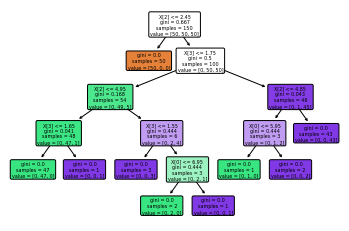

In [101]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt
plot_tree(model, filled=True,rounded=True );

In [45]:
tree2 = DecisionTreeClassifier(ccp_alpha=0.6, criterion = 'entropy')

In [46]:
tree2.fit(X,y).predict(obs.reshape(1,4))

array([1])

In [47]:
tree2.fit(X,y).predict_proba(obs.reshape(1,4))

array([[0. , 0.5, 0.5]])

# Training a Decision Tree Regressor

In [52]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_boston

In [53]:
Xb, yb = load_boston().data, load_boston().target

In [54]:
TR = DecisionTreeRegressor() # by default the criterion is the MSE (Mean Squared error), how much the better model can reduce that 

In [67]:
TR.fit(Xb,yb).predict(Xb[20].reshape(1,13))

array([13.6])

In [69]:
TR2 = DecisionTreeRegressor(criterion='mae') # mae = Mean Absoute Error

In [71]:
TR2.fit(Xb,yb).predict(Xb[50].reshape(1,13))

array([19.7])

# Training a Random Forest Classifier

In [102]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
forest = RandomForestClassifier(criterion ='entropy', n_estimators=100, max_features=2)

In [106]:
fitted_forest = forest.fit(X,y)

In [109]:
fitted_forest.predict(X[1].reshape(1,4))

array([0])

In [108]:
fitted_forest.predict_proba(X[1].reshape(1,4))

array([[1., 0., 0.]])

# Training a Random Forest Regressor

In [110]:
from sklearn.ensemble import RandomForestRegressor

In [117]:
forest_regressor = RandomForestRegressor(max_features=6, n_estimators=300, bootstrap=False, n_jobs=-1)

In [118]:
fittedFR = forest_regressor.fit(Xb,yb)

In [119]:
fittedFR.predict(Xb[0].reshape(1,13))

array([24.])

# Identifying Important Features in Random Forests

In [144]:
boston = load_boston()

In [130]:
importance = fittedFR.feature_importances_
importance

array([0.04825322, 0.0022259 , 0.05449272, 0.00239421, 0.062288  ,
       0.3636803 , 0.01849582, 0.05716256, 0.00405548, 0.02031916,
       0.04220268, 0.01469582, 0.30973414])

In [140]:
index = np.argsort(importance)
index

array([ 1,  3,  8, 11,  6,  9, 10,  0,  2,  7,  4, 12,  5])

In [151]:
index_rvs = np.argsort(importance)[::-1]
index_rvs

array([ 5, 12,  4,  7,  2,  0, 10,  9,  6, 11,  8,  3,  1])

In [125]:
Xb.shape[1]

13

In [149]:
names = [boston.feature_names[i] for i in index_rvs]

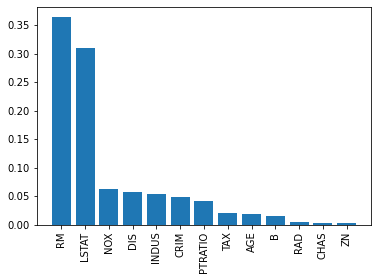

In [150]:
plt.bar(range(Xb.shape[1]), importance[index_rvs])
plt.xticks(range(Xb.shape[1]), names, rotation=90);

# Selecting Important Features in Random Forests

In [163]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel

In [156]:
Xi,yi = load_iris().data, load_iris().target

In [157]:
clf = RandomForestClassifier(n_estimators=100, max_features=2, bootstrap=False, n_jobs=-1)

In [158]:
fitclf = clf.fit(Xi,yi)

In [159]:
fitclf.predict_proba(Xi[0].reshape(1,4))

array([[1., 0., 0.]])

In [161]:
fitclf.feature_importances_

array([0.10536942, 0.0233987 , 0.43300846, 0.43822342])

In [164]:
select = SelectFromModel(fitclf, threshold=0.4) # the threshold is the feature_importances value

In [177]:
Xi.shape

(150, 4)

In [180]:
afterselection_features = select.fit_transform(Xi,yi)
afterselection_features.shape

(150, 2)

In [181]:
better_fit = clf.fit(afterselection_features, yi)

In [182]:
better_fit.predict_proba(afterselection_features[0].reshape(1,2))

array([[1., 0., 0.]])

# Handling Imbalanced Classes

In [184]:
new_features = Xi[40:, :]
new_target = yi[40:]

In [186]:
new_target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [191]:
yi_new = np.where((new_target==0), 0 ,1)

In [192]:
yi_new

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [194]:
forest = RandomForestClassifier(n_estimators=300, max_features=2, bootstrap=False, n_jobs=-1, class_weight='balanced')

In [195]:
ftforest = forest.fit(new_features, yi_new)

# Controlling Tree Size

In [198]:
decisiontree = DecisionTreeClassifier(max_depth=None, min_impurity_decrease=0, min_samples_split=2, min_samples_leaf=1 , max_leaf_nodes=None, min_weight_fraction_leaf=0)

In [199]:
decisiontree.fit(Xi,yi)

DecisionTreeClassifier(min_impurity_decrease=0, min_weight_fraction_leaf=0)

# Improving Performance Through Boosting

In [203]:
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor

In [214]:
adaclassifier = AdaBoostClassifier() #base_estimator, n_estimators, and learning_rate (default=1):
adaregressor = AdaBoostRegressor()

In [208]:
adaclassifier.fit(Xi,yi).predict(Xi[0].reshape(1,4))

array([0])

In [210]:
adaregressor.fit(Xb,yb).predict(Xb[0].reshape(1,13))

array([26.22957746])

In [211]:
adaclassifier.fit(Xi,yi).feature_importances_

array([0.  , 0.  , 0.52, 0.48])

In [212]:
adaregressor.fit(Xb,yb).feature_importances_

array([0.0238645 , 0.00090489, 0.00566026, 0.        , 0.05312142,
       0.20695976, 0.00674391, 0.143066  , 0.01366085, 0.04221876,
       0.05607305, 0.01743407, 0.43029255])

# Evaluating Random Forests with Out-of-Bag Errors

In [221]:
oobTree = RandomForestClassifier(max_features=3, n_estimators=300, oob_score=True, bootstrap=True, n_jobs=-1)

In [223]:
oobTree.fit(Xi,yi).oob_score_

0.96